# Dummy dataset

* Find this notebook at `EpyNN/nnlive/dummy_image/prepare_dataset.ipynb`. 
* Regular python code at `EpyNN/nnlive/dummy_image/prepare_dataset.py`.

This notebook is part of the series on preparing data for Neural Network regression with EpyNN.

In addition to the topic-specific content, it contains several explanations about basics or general concepts in programming that are important in the context.

Note that elements developed in the following notebooks may not be reviewed herein:

* [Boolean dataset](../dummy_boolean/prepare_dataset.ipynb)
* [String dataset](../dummy_string/prepare_dataset.ipynb)
* [Time-series (numerical)](../dummy_time/prepare_dataset.ipynb)

## What is an image?

Instinctively, an image may resemble to a 2D plane composed of **WIDTH * HEIGHT** colored units arranged together in a particular manner.

In computing, a 2D image is generally a 3D object which is composed of **WIDTH * HEIGHT** units within each plane with respect the the third dimension, which is the **DEPTH** of the image, therefore giving **WIDTH * HEIGHT * DEPTH = N_FEATURES**.

Image depth is simply the number of channels which compose the image. You are certainly aware of RGB colors, for instance. In the RGB scheme, one color is written such as ``rgb(int, int, int)`` or ``rgb(255, 0, 0)``, ``rgb(0, 255, 0)`` and ``rgb(0, 0, 255)`` for pure red, green and blue, respectively. One RGB image would therefore have a **DEPTH** equal to 3, because three channels in there.

Note that following this scheme, an image is made of Numerical data, namely integer or ``int``. 

## Why preparing a dummy dataset of images?

In addition to general considerations [reviewed here](../dummy_boolean/prepare_dataset.ipynb#Why-preparing-a-dummy-dataset-with-Boolean-features), this may be a good idea to practically understand what is an image, how to build one image and how to handle such kind of data overall.

## Prepare a set of image sample features and related label

There is no specific import for this notebook since we will create images from scratch.

### Imports

In [1]:
# EpyNN/nnlive/dummy_image/prepare_dataset.ipynb
# Standard library imports
import random

# Related third party imports
import matplotlib.pyplot as plt
import numpy as np

### Seeding

In [2]:
random.seed(0)
np.random.seed(0)

For reproducibility, as detailed [here](../dummy_boolean/prepare_dataset.ipynb#seeding).

### Generate features

To generate an image, we need:

* Dimensions: ``HEIGHT`` and  ``WIDTH``.
* Number of channels: ``DEPTH`` which is equal to ``1`` herein because we prepare grayscale images. This would be *3* for *RGB* images, *4* for *CMYK* images, etc.
* Number of tones per channel: ``N_TONES``.
* The actual palette of shades: ``GSCALE``.

The actual function to generate such image:

In [3]:
def features_image(WIDTH=28, HEIGHT=28):
    """Generate dummy image features.

    :param WIDTH: Image width, defaults to 28.
    :type WIDTH: int

    :param HEIGHT: Image height, defaults to 28.
    :type HEIGHT: int

    :return: Random image features of size N_FEATURES.
    :rtype: :class:`numpy.ndarray`

    :return: Non-random image features of size N_FEATURES.
    :rtype: :class:`numpy.ndarray`
    """
    # Number of channels is one for greyscale images
    DEPTH = 1

    # Number of features describing a sample
    N_FEATURES = WIDTH * HEIGHT * DEPTH

    # Number of distinct tones in features
    N_TONES = 16

    # Shades of grey
    GSCALE = [i for i in range(N_TONES)]

    # Random choice of shades for N_FEATURES iterations
    features = [random.choice(GSCALE) for j in range(N_FEATURES)]

    # Vectorization of features
    features = np.array(features).reshape(HEIGHT, WIDTH, DEPTH)

    # Masked features
    mask_on_features = features.copy()
    mask_on_features[np.random.randint(0, HEIGHT)] = np.zeros_like(features[0])
    mask_on_features[:, np.random.randint(0, WIDTH)] = np.zeros_like(features[:, 0])

    # Random choice between random image or masked image
    features = random.choice([features, mask_on_features])

    return features, mask_on_features

In addition to constructing one image with randomly selected tones, this function achieves a random choice between this one image ``features`` and a modified version named ``mask_on_features``.

The latter consists of the first on which one column and one row were randomly selected. On those, values for corresponding data points were set to zero, visually corresponding to the following.

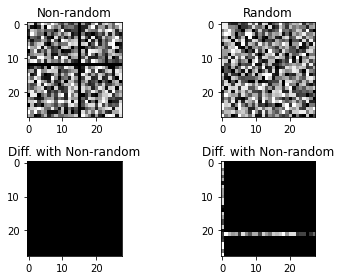

In [4]:
fig, ax = plt.subplots(2, 2)

for i in range(2):

    features, mask_on_features = features_image()
    
    title = 'Random' if np.sum(features) != np.sum(mask_on_features) else 'Non-random'

    ax[0, i].imshow(features, cmap='gray')
    ax[0, i].set_title(title)

    ax[1, i].imshow(features - mask_on_features, cmap='gray')
    ax[1, i].set_title('Diff. with Non-random')

plt.tight_layout()
plt.show()

These are image ``features`` we retrieve for two samples (first row).

Below is the difference between ``features`` and ``mask_on_features``.

When the difference renders an all black image, it means this difference is equal to zero and so the function has returned ``mask_on_features`` from the random choice within ``[features, mask_on_features]``.

Said differently, when the difference between ``features`` and ``mask_on_features`` is zero then ``features = mask_on_features`` (non-random image).

### Generate label

Label is associated with ``features`` depending on if the corresponding image is random or not random.

In [5]:
def label_features(features, mask_on_features):
    """Prepare label associated with features.

    The dummy law is:

    Image is NOT random = positive
    Image is random = negative

    :param features: Random image features of size N_FEATURES
    :type features: :class:`numpy.ndarray`

    :param mask_on_features: Non-random image features of size N_FEATURES
    :type mask_on_features: :class:`numpy.ndarray`

    :return: Single-digit label with respect to features
    :rtype: int
    """
    # Single-digit positive and negative labels
    p_label = 1
    n_label = 0

    # Test if image is not random (+)
    if np.sum(features) == np.sum(mask_on_features):
        label = p_label

    # Test if image is random (-)
    elif np.sum(features) != np.sum(mask_on_features):
        label = n_label

    return label

The code above is commented and self explaining.

Let's check the function we made for a few iterations.

In [6]:
for i in range(5):
    features, mask_on_features = features_image()
    label = label_features(features, mask_on_features)

    print(label, np.sum(mask_on_features), np.sum(mask_on_features))

1 5436 5436
0 5500 5500
1 5375 5375
0 5412 5412
0 5531 5531


### Prepare dataset

The generic function we use to actually prepare a full labeled dataset.

In [7]:
def prepare_dataset(N_SAMPLES=100):
    """Prepare a set of dummy time sample features and label.

    :param N_SAMPLES: Number of samples to generate, defaults to 100.
    :type N_SAMPLES: int

    :return: Set of sample features.
    :rtype: tuple[:class:`numpy.ndarray`]

    :return: Set of single-digit sample label.
    :rtype: tuple[int]
    """
    # Initialize X and Y datasets
    X_features = []
    Y_label = []

   # Iterate over N_SAMPLES
    for i in range(N_SAMPLES):

        # Compute random string features
        features, mask_on_features = features_image()

        # Retrieve label associated with features
        label = label_features(features, mask_on_features)

        # Append sample features to X_features
        X_features.append(features)

        # Append sample label to Y_label
        Y_label.append(label)

    # Prepare X-Y pairwise dataset
    dataset = list(zip(X_features, Y_label))

    # Shuffle dataset
    random.shuffle(dataset)

    # Separate X-Y pairs
    X_features, Y_label = zip(*dataset)

    return X_features, Y_label

We can test this function.

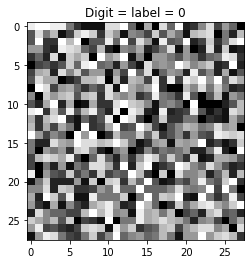

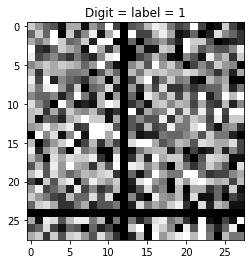

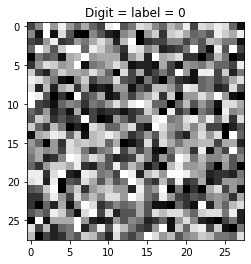

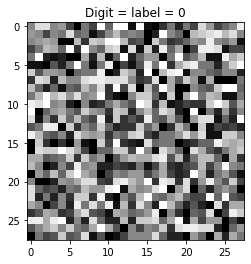

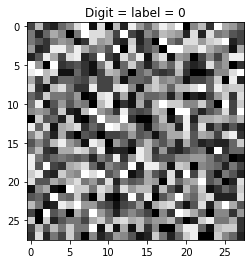

In [8]:
X_features, Y_label = prepare_dataset(N_SAMPLES=5)

for features, label in zip(X_features, Y_label):
    plt.imshow(features, cmap='gray')
    plt.title('Digit = label = %s' % label)
    plt.show()

Note that on this run we got a deviation from the expected mean: 4 images were associated with label 0 while only one was with label 1. According to the code, we expect a balanced dataset.

Just to make sure.

In [9]:
X_features, Y_label = prepare_dataset(N_SAMPLES=100)

print(Y_label.count(0))
print(Y_label.count(1))

46
54


The output of the code then fits expectations.

## Live examples

The function ``prepare_dataset()`` presented herein is used in the following live examples:

* Notebook at`EpyNN/nnlive/dummy_image/train.ipynb` or following [this link](train.ipynb). 
* Regular python code at `EpyNN/nnlive/dummy_image/train.py`.